# Projet notebook

## 1. choisir un thème en groupe (medecine, sport, musique, …)
## 2. trouver un dataset au format csv dans kaggle sur le thème choisi
   
   https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import panel as pn
import ipywidgets as widgets
import math
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [50]:
df = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016pluspropre.csv", sep=",")

Context
Motivated by Gregory Smith's web scrape of VGChartz Video Games Sales, this data set simply extends the number of variables with another web scrape from Metacritic. Unfortunately, there are missing observations as Metacritic only covers a subset of the platforms. Also, a game may not have all the observations of the additional variables discussed below. Complete cases are ~ 6,900

Content
Alongside the fields: Name, Platform, YearofRelease, Genre, Publisher, NASales, EUSales, JPSales, OtherSales, Global_Sales, we have:-

Critic_score - Aggregate score compiled by Metacritic staff
Criticcount - The number of critics used in coming up with the Criticscore
User_score - Score by Metacritic's subscribers
Usercount - Number of users who gave the userscore
Developer - Party responsible for creating the game
Rating - The ESRB ratings
Acknowledgements
This repository, https://github.com/wtamu-cisresearch/scraper, after a few adjustments worked extremely well!


In [9]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Guitar Hero III: Legends of Rock,PS2,2007,Misc,Activision,3.49,0.01,0.01,1.48,4.98,82.0,24.0,8.2,46,"Neversoft Entertainment, BudCat",T
1,Link's Crossbow Training,Wii,2007,Shooter,Nintendo,3.05,1.17,0.29,0.46,4.98,68.0,34.0,7.1,47,Nintendo,T
2,Fallout 3,X360,2008,Role-Playing,Bethesda Softworks,3.40,0.99,0.09,0.45,4.93,93.0,84.0,8.5,1655,Bethesda Game Studios,M
3,Uncharted: Drake's Fortune,PS3,2007,Action,Sony Computer Entertainment,2.31,1.72,0.12,0.77,4.92,88.0,66.0,8.1,2306,"Naughty Dog, SCE/WWS",T
4,Madden NFL 06,PS2,2005,Sports,Electronic Arts,3.98,0.26,0.01,0.66,4.91,88.0,29.0,8.0,121,EA Sports,E


Attention: Cette base de données n'est pas représentative,
les données ont été obtenues en raccourcissant la base de données mise au rebut en décembre 2016 pour les cas qui n'ont pas de valeurs pertinentes (User_Score, Global_Sales)

In [10]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,7237.000000,7237.000000,7237.000000,7237.000000,7237.000000,7237.000000,6683.000000,6683.00000,7237.000000,7237.000000
mean,2007.644466,0.300069,0.168005,0.040285,0.060481,0.569027,69.921592,28.35089,7.116747,140.295426
std,4.261398,0.432908,0.289884,0.138292,0.119429,0.771626,13.750889,18.63278,1.500946,491.301814
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.00000,0.000000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.00000,6.400000,10.000000
50%,2007.000000,0.140000,0.050000,0.000000,0.020000,0.270000,72.000000,24.00000,7.500000,24.000000
75%,2011.000000,0.360000,0.190000,0.010000,0.060000,0.680000,80.000000,39.00000,8.200000,75.000000
max,2016.000000,4.180000,3.020000,2.620000,2.930000,4.980000,98.000000,107.00000,9.700000,10665.000000


## 3. trouver une colonne à prédire
## 4. indiquer une colonne qui pourrait d’après vos connaissances sur le dataset  choisi être un bon prédicteur pour la colonne à prédire

<AxesSubplot:>

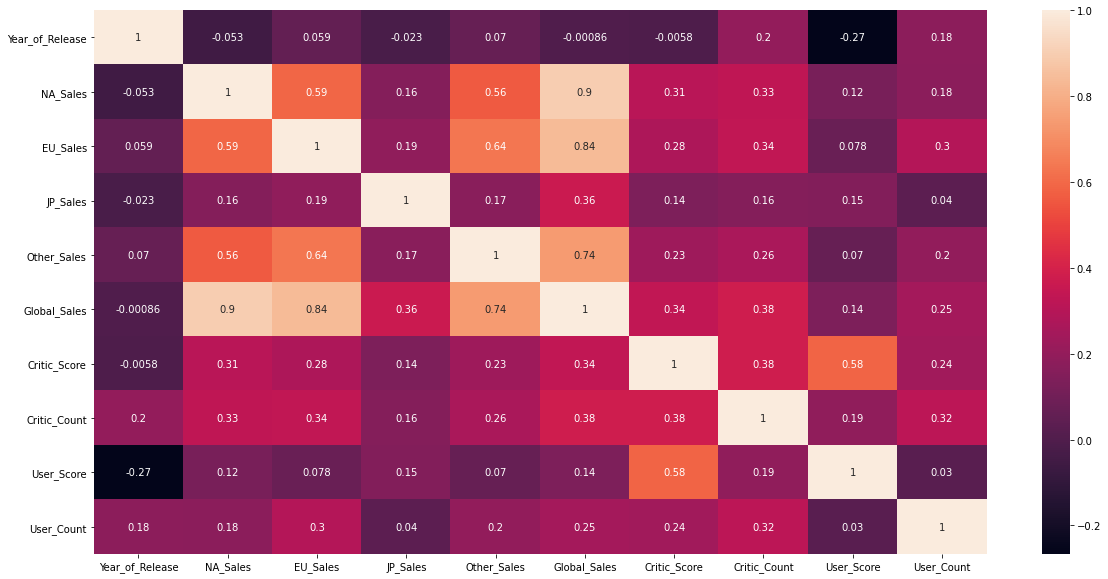

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
corrMatrix=df.corr()
sns.heatmap(corrMatrix, annot=True)

La corrélation la plus importante est entre les ventes en Amérique du Nord et les ventes mondiales, bien qu'il soit peu logique d'analyser cela plus en détail.


## 5.plotter un catplot de ces 2 colonnes (ou tout autre visu qui pourrait confirmer ou infirmer le choix précédent)

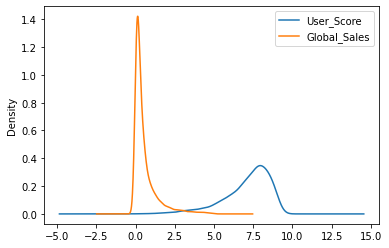

In [12]:
df[['User_Score','Global_Sales']].plot(kind='kde');

Les courbes de distribution n'ont pas de distribution gaussienne normalisée

## 6. utiliser le TP intro stats pour trouver le meilleur predicteur (ici une fonction lineaire y = ax + b), selon la methode des moindres carrés

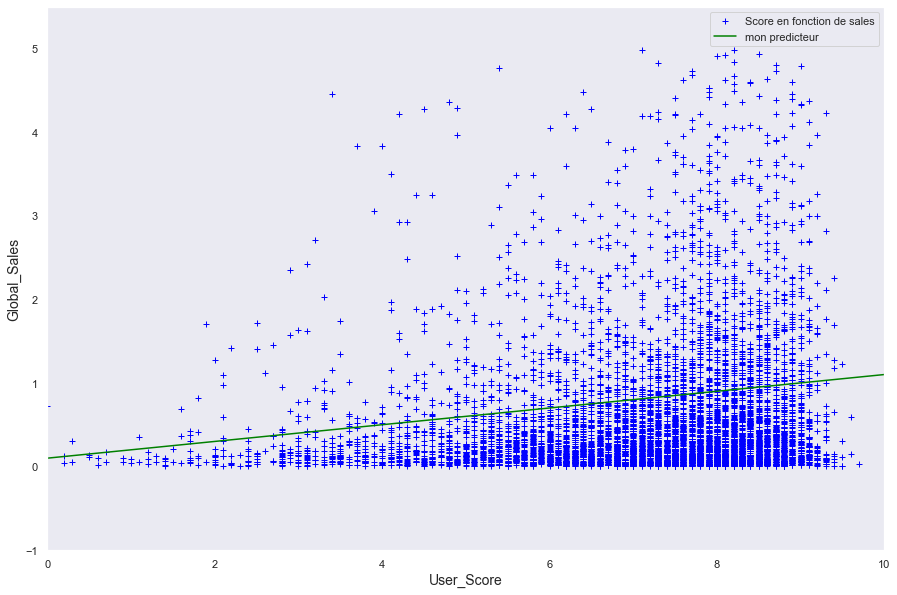

In [52]:
def pred_a(x):
    a=0.1
    b=0.1
    f=[]
    for elem in x:
        f.append(a*elem+b)
    return f

xl=[0,10]

fig = plt.figure(figsize=(15,10))
plt.plot(df['User_Score'],df['Global_Sales'],'+',c='blue',label='Score en fonction de sales')
plt.plot(xl,pred_a(xl),c='green',label='mon predicteur')
plt.xlabel('User_Score', fontsize=14)
plt.ylabel('Global_Sales', fontsize=14)
plt.xlim([0,10])
plt.ylim([-1,5.5])
plt.legend()
plt.show()

Les données, évidemment, ne sont pas uniformément réparties autour de la courbe. En plus, les entres ou Global_Sales etait au dessous le 5 est enleve, comme outlier.

In [53]:
#calc a
x=df['User_Score']
y=df['Global_Sales']

un=len(x)*(df['User_Score']*df['Global_Sales']).sum()

sumx=df['User_Score'].sum()
sumy=df['Global_Sales'].sum()

deux=len(df['User_Score'])*((df['User_Score']*df['User_Score']).sum())

trois=sumx*sumx

a=(un-(sumx*sumy))/(deux-trois)
a

0.06999125142311795

In [54]:
# Puis calcul du b
quatre=sumy*((df['User_Score']*df['User_Score']).sum())
cinq=sumx*(df['User_Score']*df['Global_Sales']).sum()
six=len(df['User_Score'])*((df['User_Score']*df['User_Score']).sum())
sept=sumx*sumx

b=(quatre-cinq)/(six-sept)
b

0.07091717366710866

In [55]:
a=0.06999125142311795
b=0.07091717366710866

def pred(x,a,b):
    return a*x+b

pred(5,a,b)

0.4208734307826984

In [17]:
#sns.lmplot(x='User_Score', y='Global_Sales', data=df,height=10, aspect=2)

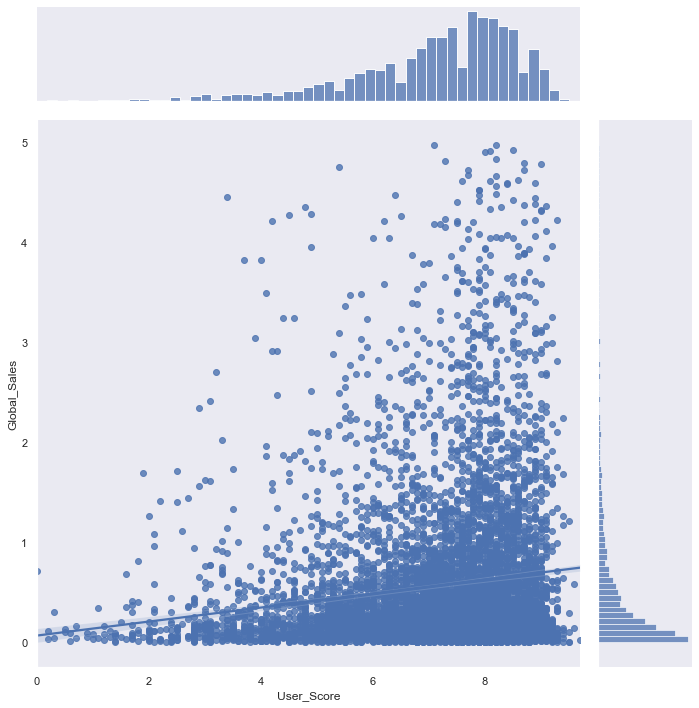

In [56]:
g = sns.JointGrid(x="User_Score", y="Global_Sales", data=df, height=10)
g = g.plot(sns.regplot, sns.histplot)

la plupart des jeux ont une cote élevée, supérieure à 7, et en même temps les ventes sont proches de 0 pour la plupart des jeux

 Regression linear avec sklearn

In [59]:
reg = LinearRegression().fit(df[['Global_Sales']], df.User_Score)
print(reg.coef_, reg.intercept_)
reg.predict(np.array([[8]]))

[0.26482569] 6.966054241731589


array([9.0846598])

In [58]:

slider= widgets.FloatSlider(description='Global Sales', value=0, max=5)
text=widgets.FloatText(disabled=True, description='User Score')
def compute(*ignore):
    text.value= round(0.06999125142311795*slider.value + 0.07091717366710866)
    if text.value>10:
          text.value=10
    elif text.value<0:
          text.valaue=0
    elif text.value:
        text.valaue
slider.observe(compute)
widgets.VBox([slider, text])

In [23]:
pn.extension()
pn.interact(compute)

Column
    [0] Column()
    [1] Row
        [0] Str(None, name='interactive00008')

## 7. evaluer la qualité du predicteur en calculant son RMSE (Root Mean Squared Error)

In [63]:
est_p=[pred(i,a,b) for i in x]
est_pa=pred_a(x) 
print("RMSE du meilleur predicteur selon moindre carré",math.sqrt(((pd.Series(est_p)-df['Global_Sales'])**2).sum()/len(df)))
print("RMSE du predicteur identifié analytiquement", math.sqrt(((pd.Series(est_pa)-df['Global_Sales'])**2).sum()/len(df)))

RMSE du meilleur predicteur selon moindre carré 0.7643887521997268
RMSE du predicteur identifié analytiquement 0.8032412059816608


In [65]:
def rmse(data_x,data_y):
    i = 0
    res = 0
    for i in range(len(data_x)):
        res += ((nouv_pred(data_x[i])-data_y[i])**2)/len(data_x)
    return math.sqrt(res)
def nouv_pred(x):
    a=0.06999125142311795
    b=0.07091717366710866
    return a*x+b
nouv_pred(x)
rmse(df['User_Score'],df['Global_Sales'])

0.7643887521997313

Plus la valeur des critères RMSE ou MSE est proche de zéro, meilleur est le modèle évalué en
terme d’exactitude. 

# QQs visualisation

In [66]:
#dx1=df.groupby("Genre").median().sort_values('Global_Sales',ascending=False)
#dx2=df.groupby("Genre").median().sort_values('User_Score',ascending=False)
#fig11 = sns.catplot(x=dx1.index, y="Global_Sales",color='darkblue', data=dx1, kind='bar',height=5, aspect=2)
#fig11 = sns.catplot(x=dx2.index, y="User_Score", color='darkblue',data=dx2, kind='bar',height=5, aspect=2)

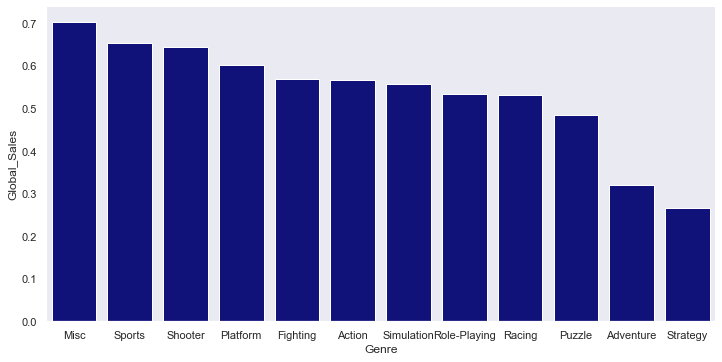

In [67]:
dy1=df.groupby("Genre").mean().sort_values('Global_Sales',ascending=False)
fig12 = sns.catplot(x=dy1.index, y="Global_Sales",color='darkblue', data=dy1, kind='bar',height=5, aspect=2)

Généralement les jeux les plus vendus sont les jeux Misc, et les moins vendus sont les stratégies, basées sur ces données

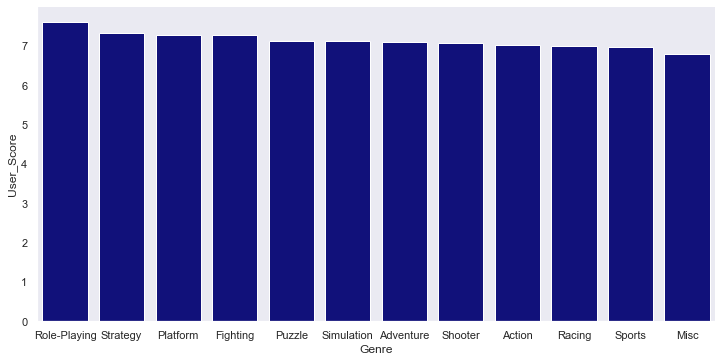

In [68]:
dy2=df.groupby("Genre").mean().sort_values('User_Score',ascending=False)
fig21 = sns.catplot(x=dy2.index, y="User_Score", data=dy2,color='darkblue', kind='bar',height=5, aspect=2)

D'un autre côté, les stratégies ont le deuxieme user_score des joueurs selon  les donnees

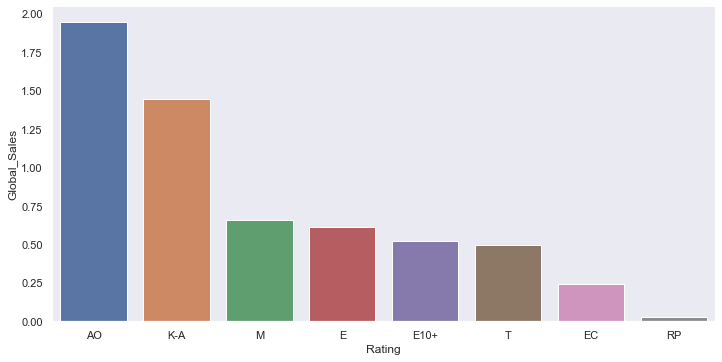

In [69]:
dr=df.groupby("Rating").mean().sort_values('Global_Sales',ascending=False)
fig11 = sns.catplot(x=dr.index, y="Global_Sales", data=dr, kind='bar',height=5, aspect=2)

Les jeux les plus vendus sont destinés aux adultes, mais ces catégories ont changé au fil des ans, de sorte qu'aujourd'hui la plupart d'entre eux appartiennent à E

AO- Adults Only (Adultes uniquement à partir de 18 ans)/Adultes seulement

K-A- Kids to Adults (Des enfants aux parents)- > E

M- Mature (Mature à partir de 17 ans)/Jeunes adultes

E- Everyone (Tout le monde)/Enfants et adultes

E10+- Everyone 10+ (Tout le monde au-dessus de 10 ans)/Enfants et adultes 10+

T- Teen (Adolescents)/Adolescents

EC-Early Childhood (Petite enfance)/Jeunes enfants

RP- Rating Pending (En attente de classement)/Cote en instance

In [ ]:
#sns.lmplot(x='User_Score', y='Global_Sales', hue='Genre', data=df,height=5, aspect=2)

In [70]:
# data sans nulls
dfd = pd.read_csv("cluster.csv", sep=",")
#dfd.describe()
dfd

,ID,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,7162,2001,0.01,0.00,0.00,0.00,0.01,46,4,2.4,21
1,2436,2002,0.01,0.00,0.00,0.00,0.01,64,7,8.0,4
2,2430,2002,0.01,0.00,0.00,0.00,0.02,55,15,8.0,5
3,4645,2002,0.01,0.00,0.00,0.00,0.02,89,11,7.0,6
4,18,2002,0.01,0.00,0.00,0.00,0.01,79,5,9.4,9
...,...,...,...,...,...,...,...,...,...,...,...
6678,976,2015,1.54,1.18,1.46,0.26,4.43,81,88,8.5,1184
6679,3684,2006,0.23,0.02,1.49,0.02,1.76,75,30,7.4,27
6680,619,2007,0.37,0.27,1.75,0.18,2.57,72,38,8.7,83
6681,178,2008,0.55,0.50,1.93,0.13,3.11,83,48,9.0,63


In [71]:
sample_df = dfd[(dfd.index % 10) == 0]
sample_df.shape

(669, 11)

[[3.61178222e+03 2.00780370e+03 2.82962963e-01 1.73111111e-01
  3.68444444e-02 6.17333333e-02 5.55096296e-01 7.14525926e+01
  2.89985185e+01 7.46992593e+00 9.62540741e+01]
 [7.28365371e+02 2.00517682e+03 4.03881145e-01 2.02655906e-01
  8.36390315e-02 6.91122524e-02 7.59347029e-01 7.87123991e+01
  3.13081438e+01 8.71438004e+00 1.59500367e+02]
 [5.05510297e+03 2.00848894e+03 2.55255530e-01 1.46147979e-01
  2.51563692e-02 5.58047292e-02 4.82623951e-01 6.62021358e+01
  2.64797864e+01 6.65163997e+00 9.70572082e+01]
 [2.17029207e+03 2.00706672e+03 3.50770941e-01 1.89562639e-01
  5.28020756e-02 7.00593032e-02 6.63313566e-01 7.50911787e+01
  3.21504818e+01 8.05270571e+00 1.34265382e+02]
 [6.47564460e+03 2.00867139e+03 2.26650906e-01 1.26335697e-01
  1.23010244e-02 4.29472025e-02 4.08321513e-01 5.66485422e+01
  2.13609141e+01 4.81544523e+00 1.12375887e+02]
 [3.14560976e+03 2.01082927e+03 6.09512195e-01 7.18536585e-01
  3.43902439e-02 1.93414634e-01 1.55609756e+00 8.69268293e+01
  5.98780488e+01

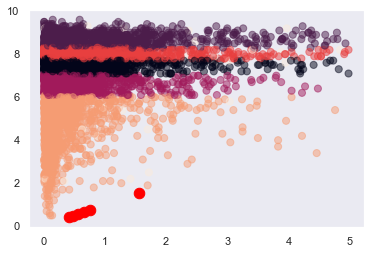

In [46]:
sample_df = DataFrame(dfd,columns=['Global_Sales','User_Score'])
  
kmeans = KMeans(n_clusters=6).fit(dfd)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(sample_df['Global_Sales'], sample_df['User_Score'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 6], centroids[:, 6], c='red', s=111)
plt.show()

Si nous utilisons la visualisation du dendogramme du bas, et définissons 6 comme nombre de clusters, nous voyons qu'ils sont principalement distribués par la valeur User_Score

[[1.79204655e+03 2.00644402e+03 3.67142015e-01 2.00692398e-01
  6.18856806e-02 7.02651738e-02 7.00150265e-01 7.62533883e+01
  3.13647613e+01 8.24145551e+00 1.75985563e+02]
 [5.37792308e+03 2.00846154e+03 2.45317726e-01 1.41644877e-01
  2.27820006e-02 5.14320462e-02 4.61401642e-01 6.33876558e+01
  2.52408027e+01 6.07333536e+00 1.22840377e+02]]


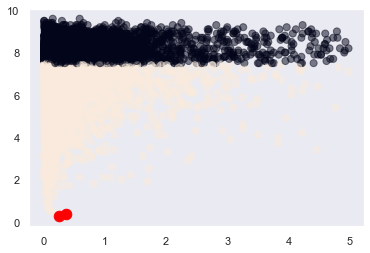

In [74]:
sample_df = DataFrame(dfd,columns=['Global_Sales','User_Score'])
  
kmeans = KMeans(n_clusters=2).fit(dfd)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(sample_df['Global_Sales'], sample_df['User_Score'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 2], centroids[:, 2], c='red', s=111)
plt.show()

Dans le cas de deux clusters, le premier serait principalement des utilisateurs qui donnent des scores élevés, supérieurs à 7,5 pour les jeux qui jouent

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [30.0, 30.0, 50.0, 50.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [40.0, 40.0, 72.5, 72.5],
  [10.0, 10.0, 56.25, 56.25],
  [95.0, 95.0, 105.0, 105.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [100.0, 100.0, 122.5, 122.5],
  [145.0, 145.0, 155.0, 155.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [150.0, 150.0, 172.5, 172.5],
  [111.25, 111.25, 161.25, 161.25],
  [33.125, 33.125, 136.25, 136.25],
  [195.0, 195.0, 205.0, 205.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [245.0, 245.0, 255.0, 255.0],
  [222.5, 222.5, 250.0, 250.0],
  [200.0, 200.0, 236.25, 236.25],
  [265.0, 265.0, 275.0, 275.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [285.0, 285.0, 302.5, 302.5],
  [270.0, 270.0, 293.75, 293.75],
  [218.125, 218.125, 281.875, 281.875],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 32

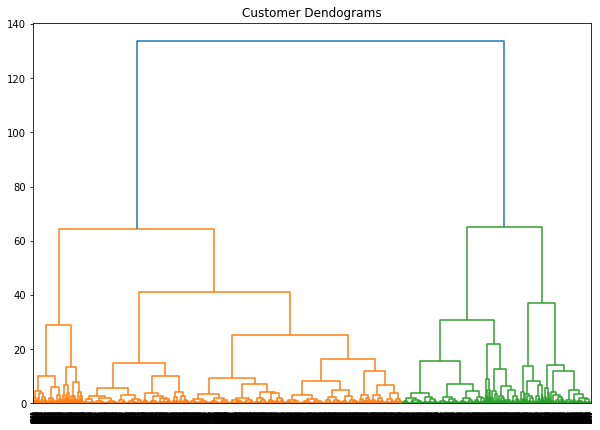

In [33]:
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(sample_df, method='ward'))
dend

Si on regarde un dendrogramme, un clustering hiérarchique, on peut avoir 2 clusters assez grands, avec une distance significative
ou nous pouvons en avoir 6 plus petits ... ce sont des solutions de cadre

In [75]:
df["Year_of_Release"] = pd.to_numeric(df["Year_of_Release"], downcast="float")
df1 = df[df['Year_of_Release'] > 2010]


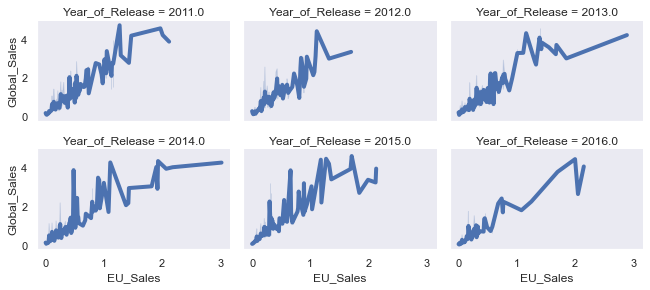

In [76]:
sns.set_theme(style="dark")


# Plot each year's time series in its own facet
g = sns.relplot(
    data=df1,x="EU_Sales",
    y="Global_Sales", col="Year_of_Release", 
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False
)

In [36]:
data_1 = df.groupby("Platform").mean().sort_values('Global_Sales',ascending=False)
data_1[['User_Count', 'Global_Sales']]

,User_Count,Global_Sales
Platform,,
PS,43.035211,0.840141
PS4,458.138655,0.768866
PS3,142.416970,0.744533
XOne,285.218391,0.706322
X360,134.416667,0.699287
PS2,37.254364,0.692161
Wii,36.274621,0.648087
WiiU,204.581633,0.560000
DS,26.703407,0.535531


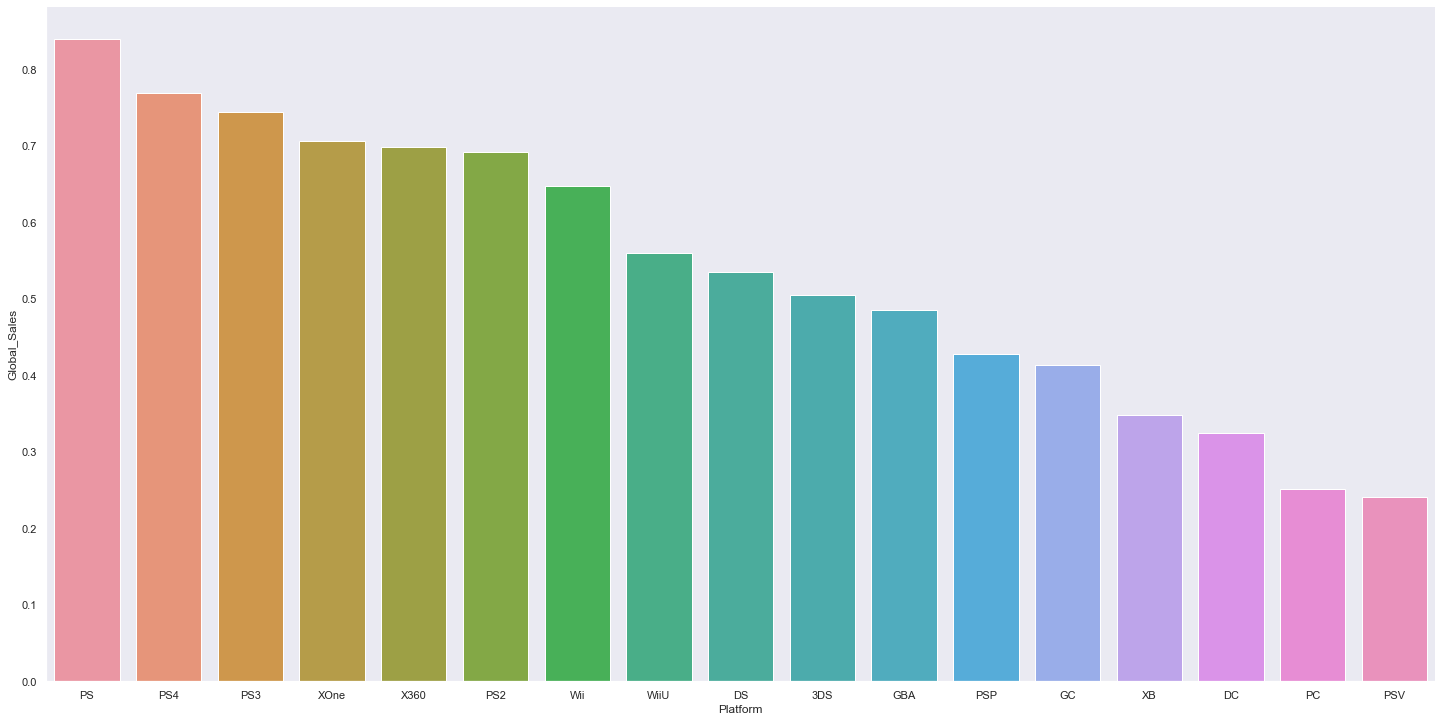

In [37]:
sns.catplot(x=data_1.index, y="Global_Sales", data=data_1, kind='bar',height=10, aspect=2)
plt.show()

Text(0, 0.5, 'Ventes mondiales')

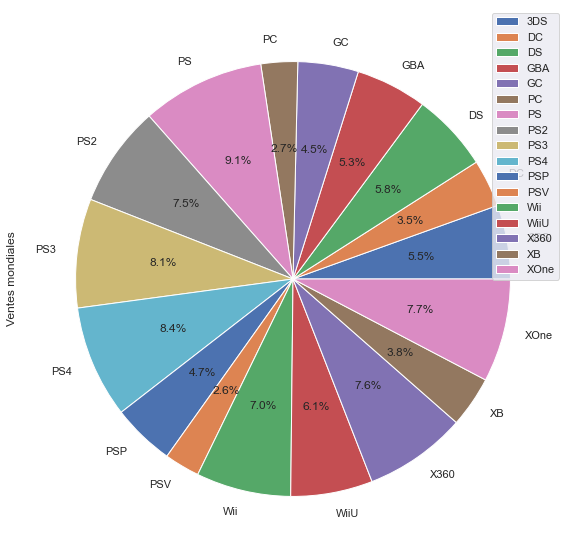

In [38]:
data_pie = df.groupby('Platform')[['Global_Sales']].mean()
data_pie.plot.pie(subplots=True, autopct="%.1f%%", figsize=(10, 10))
plt.ylabel('Ventes mondiales')

Text(8.959999999999994, 0.5, 'Ventes mondiales')

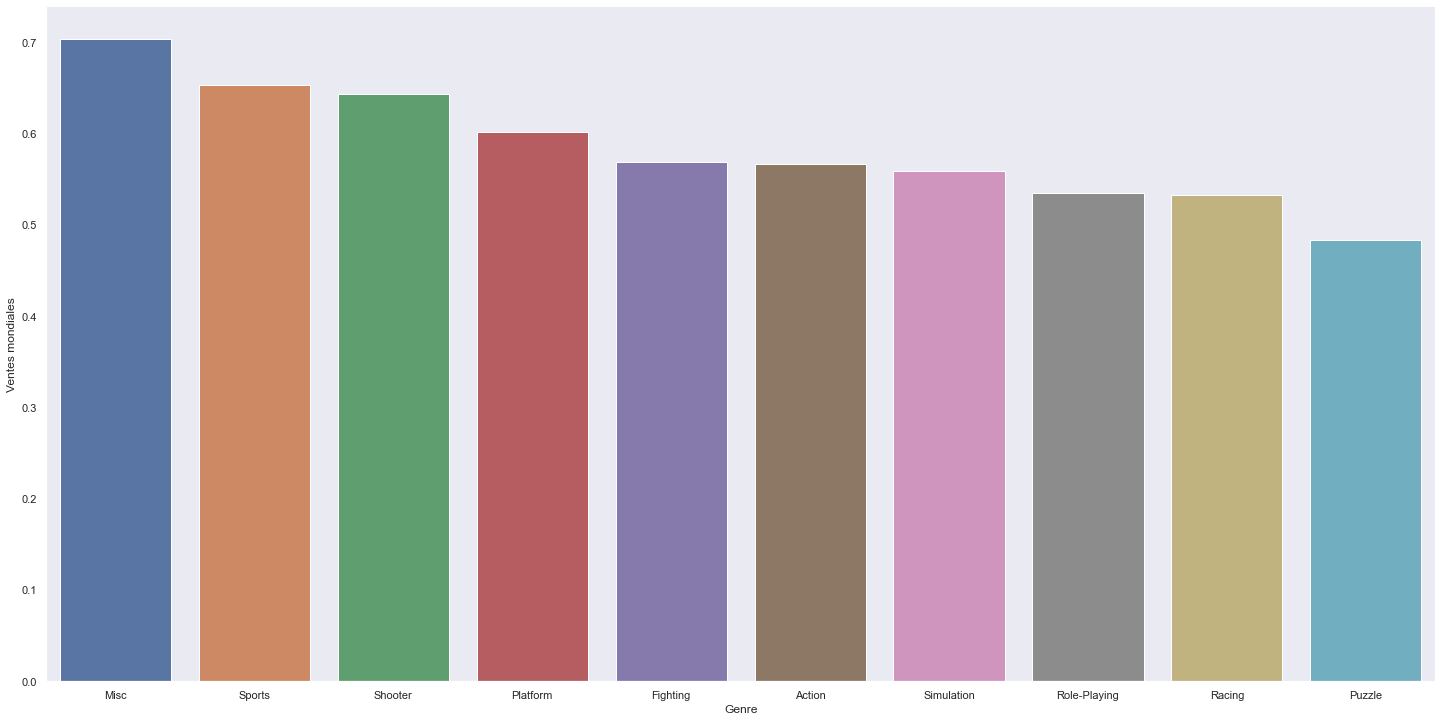

In [39]:
data_3 = df.groupby("Genre").mean().sort_values('Global_Sales', ascending = False).head(10)
sns.catplot(x = data_3.index, y = "Global_Sales", data = data_3, kind = 'bar', height = 10, aspect = 2)
plt.xlabel("Genre")
plt.ylabel("Ventes mondiales")

In [40]:
# Convertir les années en valeur numérique
df['Year_of_Release'] = pd.to_numeric(df['Year_of_Release'], downcast='integer')
df['User_Score'] = df['User_Score'].astype(float)
data_4 = df.groupby("Year_of_Release").mean().sort_values('User_Count', ascending = False)

Text(0, 0.5, 'Ventes mondiales')

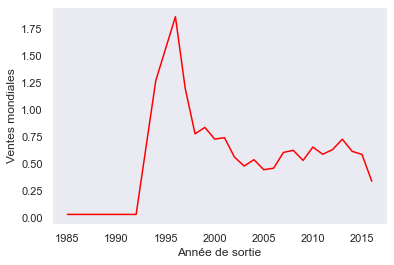

In [49]:
sns.lineplot(x= data_4.index, y='Global_Sales', data= data_4, color= 'red')
plt.xlabel("Année de sortie", fontsize=12)
plt.ylabel("Ventes mondiales", fontsize=12)

Text(-141.41500000000002, 0.5, 'Jeux')

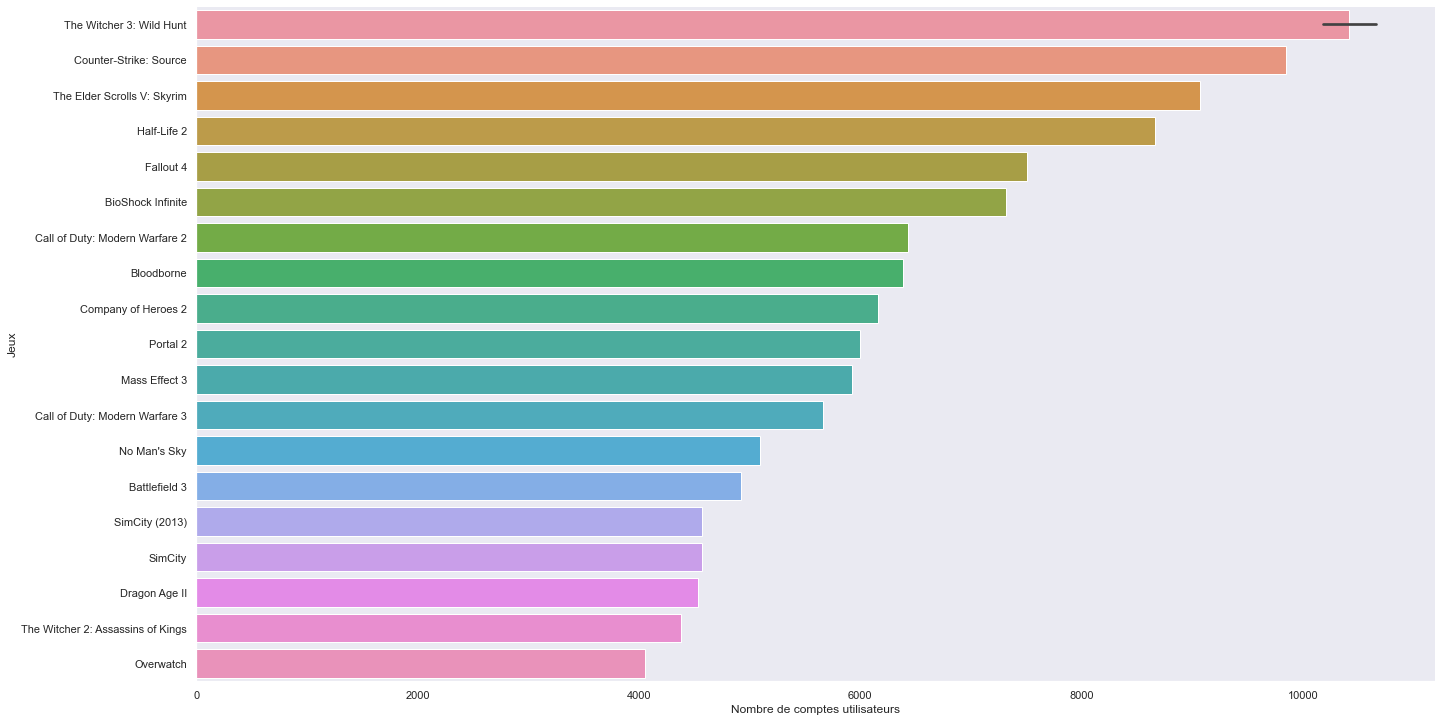

In [42]:
data_7 = df[['Name', 'User_Score', 'User_Count']].sort_values('User_Count', ascending = False).head(20)
sns.catplot(x = "User_Count", y = "Name", data = df.sort_values('User_Count', ascending = False).head(20), kind = 'bar', height = 10, aspect = 2)
plt.xlabel("Nombre de comptes utilisateurs")
plt.ylabel("Jeux")

Text(-141.41500000000002, 0.5, 'Jeux')

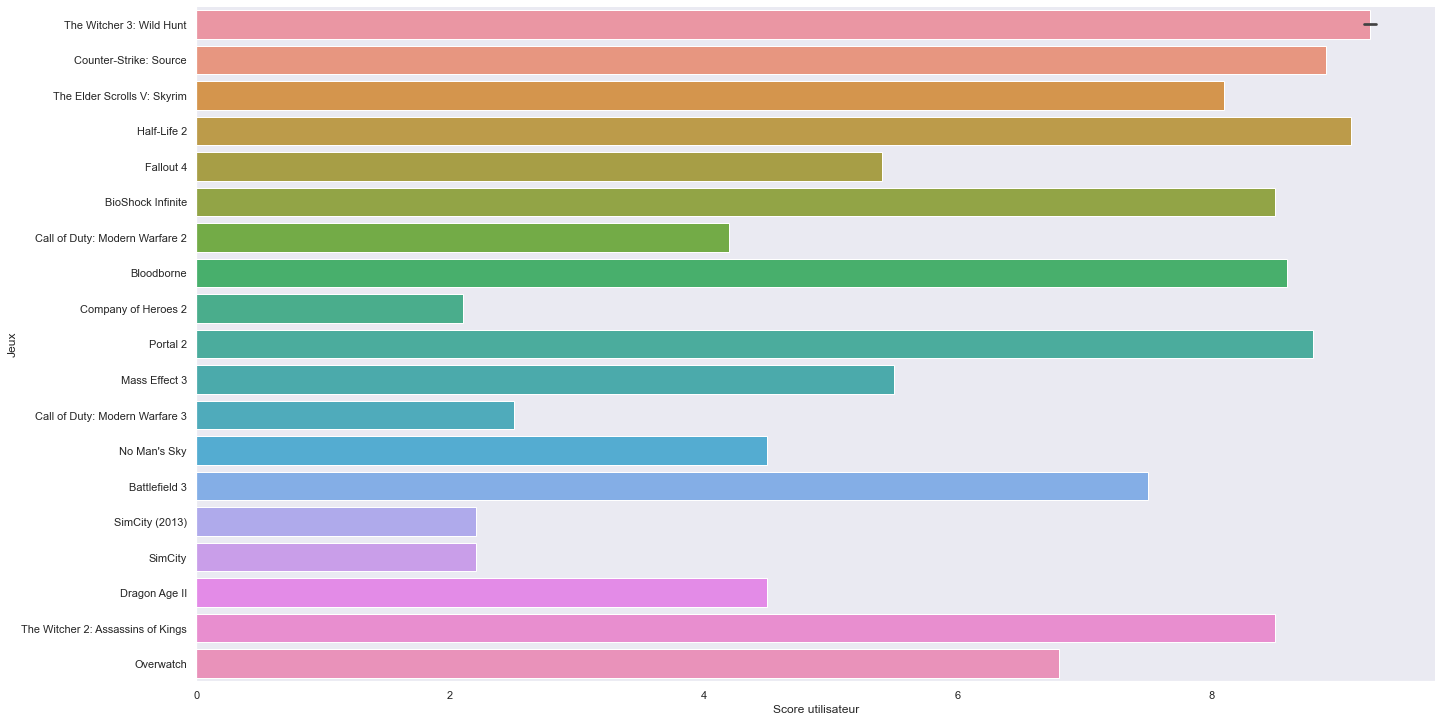

In [43]:
data_5 = df.sort_values('User_Count', ascending = False).head(20)
sns.catplot(x = "User_Score", y = "Name", data = data_5, kind = 'bar', height = 10, aspect = 2)
plt.xlabel("Score utilisateur")
plt.ylabel("Jeux")

<AxesSubplot:xlabel='Genre', ylabel='Platform'>

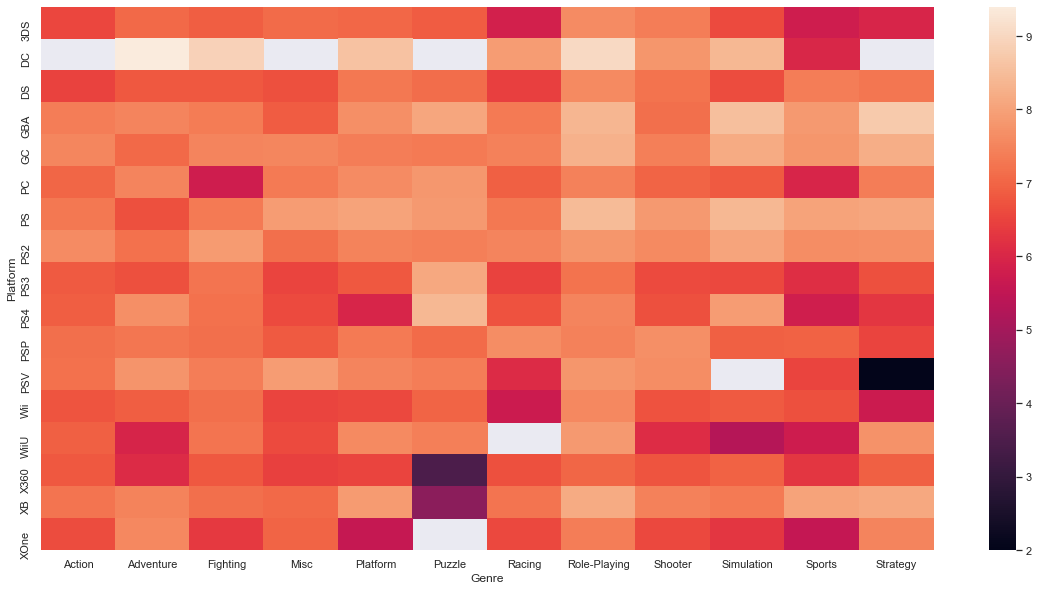

In [44]:
data_6 = df.pivot_table(values='User_Score',index='Platform',columns='Genre')
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data_6)

<AxesSubplot:xlabel='Year_of_Release', ylabel='Genre'>

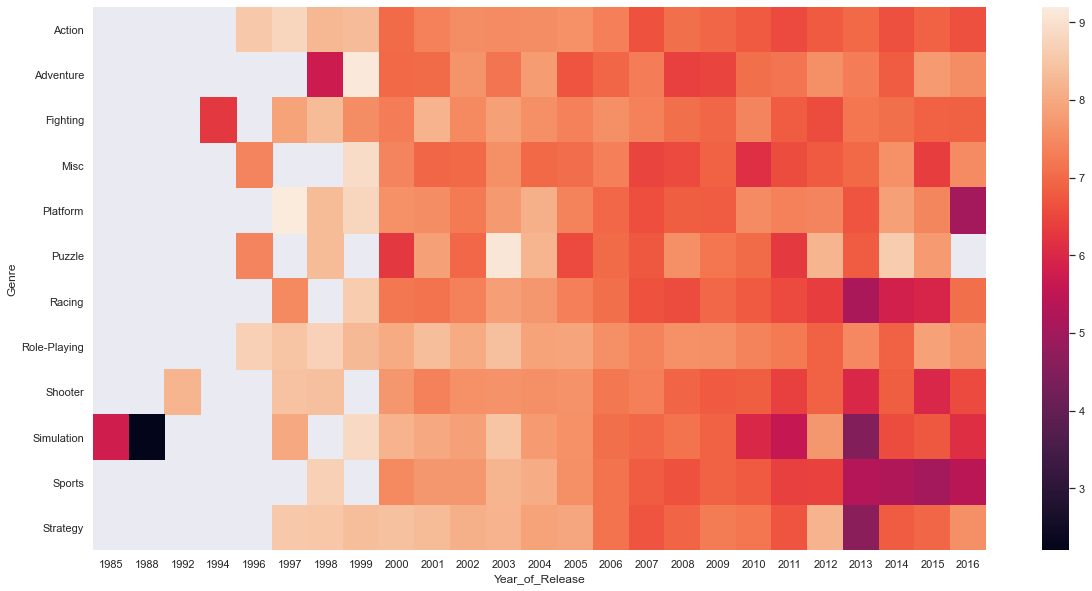

In [45]:
data_7 = df.pivot_table(values='User_Score',index='Genre',columns='Year_of_Release')
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data_7)